In [4]:
import glob
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
results = []
for filename in glob.glob(os.path.expanduser("~/dsi/good-food-purchasing-nova-classification/test-results/gpt-4.1-nano/*.csv")):
    results.append(pd.read_csv(filename, header=None, names=["index", "P1", "P2", "P3", "P4", "truth"]))

results = pd.concat(results).set_index("index").sort_index()
results

,P1,P2,P3,P4,truth
index,,,,,
0,3.653433e-08,4.222799e-06,0.999987,4.785058e-06,4
1,1.328799e-06,1.914317e-07,0.245064,7.548511e-01,4
2,7.328285e-03,9.598158e-01,0.032843,1.290032e-08,3
3,6.131744e-06,7.469994e-05,0.222677,7.772202e-01,4
4,9.958705e-01,3.591670e-03,0.000486,0.000000e+00,3
...,...,...,...,...,...
995,1.858056e-03,8.494003e-01,0.147604,1.126968e-03,4
996,9.924483e-01,2.787583e-03,0.004056,1.526557e-07,4
997,4.675429e-06,1.121577e-05,0.592627,4.073064e-01,4


In [18]:
results[["P1", "P2", "P3", "P4"]].sum(axis=1).describe()

count    1000.000000
mean        0.999958
std         0.000097
min         0.998474
25%         0.999957
50%         0.999987
75%         0.999997
max         1.000000
dtype: float64

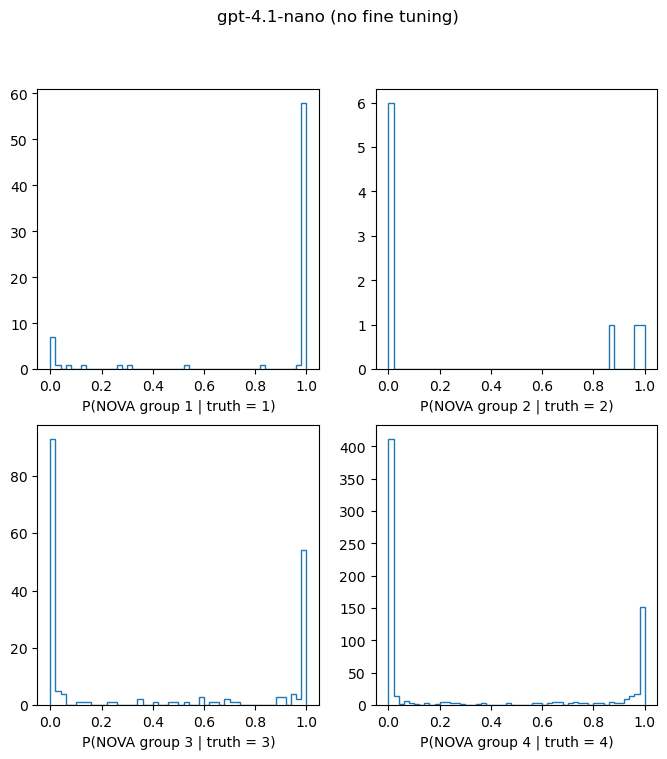

In [29]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))

ax1.hist(results.query("truth == 1")["P1"], bins=50, range=(0, 1), histtype="step")
ax1.set_xlabel("P(NOVA group 1 | truth = 1)")

ax2.hist(results.query("truth == 2")["P2"], bins=50, range=(0, 1), histtype="step")
ax2.set_xlabel("P(NOVA group 2 | truth = 2)")

ax3.hist(results.query("truth == 3")["P3"], bins=50, range=(0, 1), histtype="step")
ax3.set_xlabel("P(NOVA group 3 | truth = 3)")

ax4.hist(results.query("truth == 4")["P4"], bins=50, range=(0, 1), histtype="step")
ax4.set_xlabel("P(NOVA group 4 | truth = 4)")

fig.suptitle("gpt-4.1-nano (no fine tuning)")

None